<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 6th exercise: <font color="#C70039">Work with Autoencoders for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   03.11.2025
* Student: Tim Voßmerbäumer

<img src="https://blog.keras.io/img/ae/autoencoder_schema.jpg" style="float: center;" width="700">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too.
* This applies to all exercises throughout this course.

---------------------------------

### <font color="ce33ff">DESCRIPTION</font>:
Autoencoder is an unsupervised artificial neural network (ANN) that learns how to efficiently compress and encode data and then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.

An Autoencoder reduces data dimensions by learning how to ignore the noise in the data and thus outliers.
In the section above, you can seen an example of the input/output image from the MNIST dataset to an Autoencoder.

#### Autoencoder Components:
An Autoencoder consists of four main parts:

1. Encoder: In which the model learns how to reduce the input dimensions and compress the input data into an encoded representation.

2. Bottleneck: which is the layer that contains the compressed representation of the input data. This is the lowest possible dimensions of the input data. The bottlneck is also called latent vector. The concept of the latent space and latent vectors becomes important later on as we move forward to understand Generative Models. 

3. Decoder: In which the model learns how to reconstruct the data from the encoded representation to be as close to the original input as possible.

4. Reconstruction Loss: This is the method that measures how well the decoder is performing and how close the output is to the original input.

As always in ANNs, the training itself involves back propagation in order to minimize the network’s reconstruction loss.

Due to this features of an Autoencoder the use cases are manyfold. One of the obviously is anomaly detection. 

#### Autoencoder Architecture:

The network architecture for Autoencoders can vary between simple Feed Forward networks, Recurrent Neural Networks (LSTM) or Convolutional Neural Networks (CNN) depending on the use case. 

---------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * the example below shows how to use an autoencoder for anomaly detection

4. <font color=green>Develop an Autoencoder for Domain Adaptation (Me -> Walter White ). You can of course also take own data, e.g. a photo of yours and someone else.</font>
5. Set at least the following hyperparameters for training (epochs=100000, shuffle=True).
6. Implement a CNN for working out important features for the adaptation. If you feel lost in the exercise, please visit the sample solution.
7. There is also an implementation of data augmentation that helps you building up your data set from one single "original" image. 
---------------------------------

### Heisenberg Autoencoder code
Your code did not work for me, so I changed the sequential model, to a functional model, because I had the error "Sequential() is never called and therefore is empty",
when reaching the line: trained_model = ... 

In [2]:
'''
# load the inbuild mnist data set (8bit grayscale digits)
# https://en.wikipedia.org/wiki/MNIST_database
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize the training and the validation data set
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255
'''


# build the auto-encoding layers
'''
autoencoder = Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,   activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
'''
'''
NOTE:
-----
The Exponential Linear Unit (ELU) is an activation function for neural networks. 
In contrast to ReLUs (which you know), ELUs have negative values which allows them to push mean unit 
activations closer to zero like batch normalization but with lower computational complexity.
'''    

# train the model and finally assign the encoding to the decoder
'''
NOTE:
-----
make sure you understand, that you are training on train_x and not on train_y but train_x again for the reconstruction
the same for the validation (val_x, val_x)
'''
'''
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=5, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)

encoded_data = encoder.predict(train_x)  # bottleneck representation

decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)
'''

"\ntrained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=5, verbose=1, validation_data=(val_x, val_x))\nencoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)\n\nencoded_data = encoder.predict(train_x)  # bottleneck representation\n\ndecoded_output = autoencoder.predict(train_x)        # reconstruction\nencoding_dim = 10\n\n# return the decoder\nencoded_input = Input(shape=(encoding_dim,))\ndecoder = autoencoder.layers[-3](encoded_input)\ndecoder = autoencoder.layers[-2](decoder)\ndecoder = autoencoder.layers[-1](decoder)\ndecoder = Model(encoded_input, decoder)\n"

### Auto-Encoding
If you have correlated input data, the auto-encoder method will work very well because the encoding operation relies on the correlated features to compress the data.
Let’s consider that an auto-encoder is trained on the MNIST dataset. 
As you know already, using a simple FeedForward neural network, this can be done by building a simple 6 layers network as below:

### Imports

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam

## Autoencoder 1 (10 Epochs)

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

input_img_1 = Input(shape=(784,))

encoded_1 = Dense(512, activation='elu')(input_img_1)
encoded_1 = Dense(128, activation='elu')(encoded_1)
bottleneck_1 = Dense(10, activation='linear', name="bottleneck_1")(encoded_1)

decoded_1 = Dense(128, activation='elu')(bottleneck_1)
decoded_1 = Dense(512, activation='elu')(decoded_1)
final_output_tensor_1 = Dense(784, activation='sigmoid')(decoded_1)

autoencoder1 = Model(input_img_1, final_output_tensor_1)

autoencoder1.compile(loss='mean_squared_error', optimizer = Adam())

print("--- Starting Autoencoder 1 Training (10 Epochs) ---")
trained_model_1 = autoencoder1.fit(
    train_x, 
    train_x, 
    batch_size=1024, 
    epochs=10, 
    verbose=1, 
    validation_data=(val_x, val_x)
)
print("Autoencoder 1 Training complete.")
#print(autoencoder1.summary())

--- Starting Autoencoder 1 Training (10 Epochs) ---
Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0748 - val_loss: 0.0505
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - val_loss: 0.0343
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0317 - val_loss: 0.0288
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0277 - val_loss: 0.0259
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0253 - val_loss: 0.0239
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0236 - val_loss: 0.0225
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0223 - val_loss: 0.0214
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0213 - val_loss: 0.0205
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0205 - val_loss: 0.0198
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0198 - val_loss: 0.0191
Autoencoder 1 Training complete.


## Autoencoder 2 (100 Epochs)

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

input_img_2 = Input(shape=(784,))

encoded_2 = Dense(512, activation='elu')(input_img_2)
encoded_2 = Dense(128, activation='elu')(encoded_2)
bottleneck_2 = Dense(10, activation='linear', name="bottleneck_2")(encoded_2)

decoded_2 = Dense(128, activation='elu')(bottleneck_2)
decoded_2 = Dense(512, activation='elu')(decoded_2)
final_output_tensor_2 = Dense(784, activation='sigmoid')(decoded_2)

autoencoder2 = Model(input_img_2, final_output_tensor_2)

autoencoder2.compile(loss='mean_squared_error', optimizer = Adam())

print("--- Starting Autoencoder 2 Training (100 Epochs) ---")
trained_model_2 = autoencoder2.fit(
    train_x, 
    train_x, 
    batch_size=1024, 
    epochs=100, 
    verbose=1, 
    validation_data=(val_x, val_x)
)
print("Autoencoder 2 Training complete.")
#print(autoencoder2.summary())

--- Starting Autoencoder 2 Training (100 Epochs) ---
Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0778 - val_loss: 0.0510
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0435 - val_loss: 0.0367
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0344 - val_loss: 0.0310
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0294 - val_loss: 0.0271
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0264 - val_loss: 0.0248
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0243 - val_loss: 0.0231
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0228 - val_loss: 0.0217
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217 - val_loss: 0.0208
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0208 - val_loss: 0.0199
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0200 - val_loss: 0.0193
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - val_loss: 0.0188

## Autoencoder 3 (1000 Epochs)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

input_img_3 = Input(shape=(784,))

encoded_3 = Dense(512, activation='elu')(input_img_3)
encoded_3 = Dense(128, activation='elu')(encoded_3)
bottleneck_3 = Dense(10, activation='linear', name="bottleneck_3")(encoded_3)

decoded_3 = Dense(128, activation='elu')(bottleneck_3)
decoded_3 = Dense(512, activation='elu')(decoded_3)
final_output_tensor_3 = Dense(784, activation='sigmoid')(decoded_3)

autoencoder3 = Model(input_img_3, final_output_tensor_3)

autoencoder3.compile(loss='mean_squared_error', optimizer = Adam())

print("--- Starting Autoencoder 3 Training (1000 Epochs) ---")
trained_model_3 = autoencoder1.fit(
    train_x, 
    train_x, 
    batch_size=1024, 
    epochs=1000, 
    verbose=1, 
    validation_data=(val_x, val_x)
)
print("Autoencoder 3 Training complete.")
#print(autoencoder3.summary())

--- Starting Autoencoder 3 Training (1000 Epochs) ---
Epoch 1/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0157 - val_loss: 0.0155
Epoch 2/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - val_loss: 0.0153
Epoch 3/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0153 - val_loss: 0.0151
Epoch 4/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 5/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0149 - val_loss: 0.0148
Epoch 6/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 7/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0146 - val_loss: 0.0145
Epoch 8/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0145 - val_loss: 0.0145
Epoch 9/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 10/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 11/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - val_

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_3 (Dense)            │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 938,522 (3.58 MB)

 Trainable params: 938,522 (3.58 MB)

 Non-trainable params: 0 (0.00 B)

None


## Results (Heisenberg)

As you can see in the output for 10 Epochs, the last reconstruction loss/error for the validation set is approx. 0.0197, which is great. 
Now, if we pass any normal image from the MNIST dataset, the reconstruction loss will be very low (< 0.02) BUT if we tried to pass any other different image (outlier / anomaly), we will get a high reconstruction loss value because the network failed to reconstruct the image/input that is considered an anomaly.

## Results (Voßmerbäumer)

The autoencoder with 100 epochs has even less reconstruction loss, so based on the training duration, the efficacy of the reconstruction increases.

And the one with 1000 epochs has even less rec. loss.

## Auto-Encoders for Anomaly Detection

Now, let’s do some anomaly detection. The code below uses two different images to predict the anomaly score (reconstruction error) using the autoencoder network we trained above. 

The first image is from the MNIST and the result is error=2.46241018. This means that the image is not an anomaly. The second image (yoda.png) obviously does not belong to the training dataset and the result is: error=2727.0718. This high error means that the image is an anomaly. Even the third image. The same concept applies to any type of dataset.

In [6]:
# If you are using a newer version of keras than '2.4.3', read this article below.
# It describes a versioning issue in the keras libs
'''https://stackoverflow.com/questions/72383347/how-to-fix-it-attributeerror-module-keras-preprocessing-image-has-no-attribu'''
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array

# take an image from the validation data set or the training data set, respectively
input_img = val_x[50] 
input_img_flat = input_img.reshape(1,784)

target_data = autoencoder1.predict(input_img_flat)

dist = np.linalg.norm(input_img_flat - target_data, axis=-1)

print(dist)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[2.72009445]


In [7]:
# Now take Master Yoda as the test image. The error score will be very high (error=2727.0718)
img = load_img("./data/yoda.png", target_size=(28, 28), color_mode = "grayscale")
input_img = img_to_array(img)

input_img_flat = input_img.reshape(1,784)
target_data = autoencoder2.predict(input_img_flat)
dist = np.linalg.norm(input_img_flat - target_data, axis=-1)
print(dist)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[2726.1545]


In [8]:
''' 
Now take a Mnist image which is taken from the google image search and although it is super similar to the training data
it does not belong to the same data distribution the auto-encoder was trained on. 
It produces an error almost as high as yoda.png (approx error=2551.99)
This makes autoencoders a very robust technique for anomaly detection.
'''
img = load_img("./data/similarMnistNumber.jpg", target_size=(28, 28), color_mode = "grayscale")
input_img = img_to_array(img)

input_img_flat = input_img.reshape(1,784)
target_data = autoencoder2.predict(input_img_flat)
dist = np.linalg.norm(input_img_flat - target_data, axis=-1)

print(dist)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[2551.827]


## Domain Adaptation (Heisenberg -> Heisenberg)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os
from   tqdm import tqdm
import time

SIZE=256

In [16]:
# import input img
input_img_data=[]
input_path = './data/heisenberg_heisenberg/gernot/'
files=os.listdir(input_path)
# read all images in the folder (different rotations and flips of the original)
for i in tqdm(files):
    img=cv2.imread(input_path+'/'+i,1)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    input_img_data.append(img_to_array(img))
# -----------------------------------------  
# import output_img
output_img_data=[]
output_path = './data/heisenberg_heisenberg/walter/'
files=os.listdir(output_path)
# read all images in the folder (same rotations and flips as img)
for i in tqdm(files):
    img=cv2.imread(output_path+'/'+i,1)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    output_img_data.append(img_to_array(img))

input_img_array = np.reshape(input_img_data, (len(input_img_data), SIZE, SIZE, 3))
input_img_array = input_img_array.astype('float32') / 255. # normalize
output_img_array= np.reshape(output_img_data, (len(output_img_data), SIZE, SIZE, 3))
output_img_array = output_img_array.astype('float32') / 255. # normalize

# Original image for prediction of output_img 
# this one does not belong to the training set
test_img_data=[]

test_img=cv2.imread('./data/heisenberg_heisenberg/gernot-heisenberg-original.jpg', 1)   # Change 0 to 1 for color images
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) # Changing BGR to RGB to show images in true colors
test_img=cv2.resize(test_img,(SIZE, SIZE))
test_img_data.append(img_to_array(test_img))

test_img_array = np.reshape(test_img_data, (len(test_img_data), SIZE, SIZE, 3))
test_img_array = test_img_array.astype('float32') / 255. # normalize

# set the start time
# later needed for calculating the computation time
start=time.time()

100%|██████████| 50/50 [00:00<00:00, 126.48it/s]


In [24]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# model.summary()


In [25]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='einstein_logs')]

# fit the model of input_img to output_img 
epochs = 250 #5000
model.fit(input_img_array, output_img_array, epochs=epochs, shuffle=True)#, callbacks=callbacks)

# print out the computation time
finish=time.time()
print('total computation time = ', finish-start)

# save the model
model.save("domain_adapt_autoenc_epochs." + str(epochs) + ".keras")

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.0295 - loss: 0.1451
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.0295 - loss: 0.1345
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.0286 - loss: 0.1288
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.0191 - loss: 0.1244
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.0088 - loss: 0.1232
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.0087 - loss: 0.1232
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.0087 - loss: 0.1231
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.0087 - loss: 0.1224
Epoch 9/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.0087 - loss: 0.1215
Epoch 10/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.0087 - loss: 0.1204
Epoch 11/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.0087 - loss: 0.1196
Epoch 12/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy:

### Test prediction with 50 epochs

output of test image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


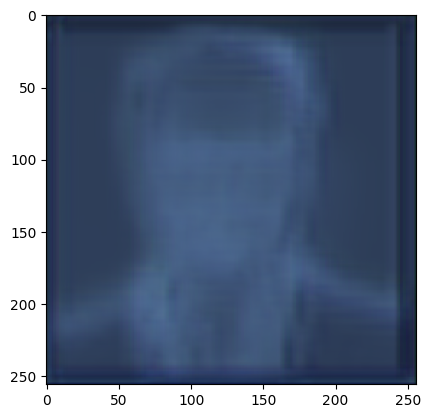

In [27]:
# predict the original image as test image, 
# since it did not belong to the training data.
# if the domain was really adapted, then the result would look like output_img
print("output of test image")

# load the model here
model = tf.keras.models.load_model("domain_adapt_autoenc_epochs.50.keras")

# now predict and see how it adapts to the new domain
pred = model.predict(test_img_array)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.show()

### Test prediction with 250 epochs

output of test image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


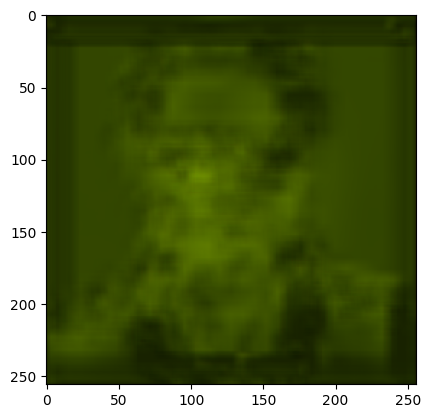

In [26]:
# predict the original image as test image, 
# since it did not belong to the training data.
# if the domain was really adapted, then the result would look like output_img
print("output of test image")

# load the model here
model = tf.keras.models.load_model("domain_adapt_autoenc_epochs.250.keras")

# now predict and see how it adapts to the new domain
pred = model.predict(test_img_array)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.show()

### Test prediction with 1000 epochs

output of test image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


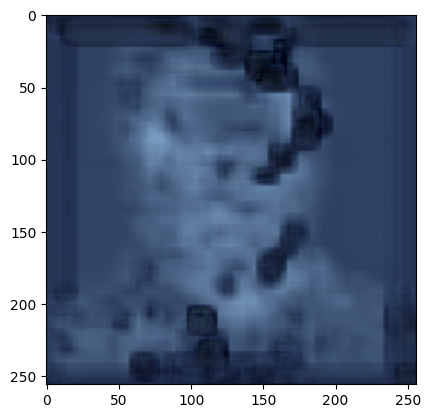

In [ ]:
print("output of test image")

# load the model here
model = tf.keras.models.load_model("domain_adapt_autoenc_epochs.1000.keras")

# now predict and see how it adapts to the new domain
pred = model.predict(test_img_array)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.show()


## Domain Adaptation (Voßmerbäumer -> Linnemann)

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os
from   tqdm import tqdm
import time

SIZE=256

In [ ]:
# import input img
input_img_data=[]
input_path = './data/augmented/tim/'
files=os.listdir(input_path)
# read all images in the folder (different rotations and flips of the original)
for i in tqdm(files):
    img=cv2.imread(input_path+'/'+i,1)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    input_img_data.append(img_to_array(img))
# -----------------------------------------  
# import output_img
output_img_data=[]
output_path = './data/augmented/linnemann/'
files=os.listdir(output_path)
# read all images in the folder (same rotations and flips as img)
for i in tqdm(files):
    img=cv2.imread(output_path+'/'+i,1)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    output_img_data.append(img_to_array(img))

input_img_array = np.reshape(input_img_data, (len(input_img_data), SIZE, SIZE, 3))
input_img_array = input_img_array.astype('float32') / 255. # normalize
output_img_array= np.reshape(output_img_data, (len(output_img_data), SIZE, SIZE, 3))
output_img_array = output_img_array.astype('float32') / 255. # normalize

# Original image for prediction of output_img 
# this one does not belong to the training set
test_img_data=[]

test_img=cv2.imread('./data/linnemann/linnemann.jpg', 1)   # Change 0 to 1 for color images
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) # Changing BGR to RGB to show images in true colors
test_img=cv2.resize(test_img,(SIZE, SIZE))
test_img_data.append(img_to_array(test_img))

test_img_array = np.reshape(test_img_data, (len(test_img_data), SIZE, SIZE, 3))
test_img_array = test_img_array.astype('float32') / 255. # normalize

# set the start time
# later needed for calculating the computation time
start=time.time()

100%|██████████| 51/51 [00:00<00:00, 763.24it/s]


In [37]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# model.summary()


In [38]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='einstein_logs')]

# fit the model of input_img to output_img 
epochs = 100 #5000
model.fit(input_img_array, output_img_array, epochs=epochs, shuffle=True)#, callbacks=callbacks)

# print out the computation time
finish=time.time()
print('total computation time = ', finish-start)

# save the model
model.save("domain_adapt_autoenc_epochs." + str(epochs) + ".keras")

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.8592 - loss: 0.2523
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.8898 - loss: 0.2354
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.8931 - loss: 0.2055
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.8932 - loss: 0.1640
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.8932 - loss: 0.1546
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.8932 - loss: 0.1319
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.8929 - loss: 0.0969
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.8840 - loss: 0.0790
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.8615 - loss: 0.0671
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.7874 - loss: 0.0626
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.0382 - loss: 0.0596
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy:

### Test adaptation with 250 epochs (TIM-FOTO)

output of test image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


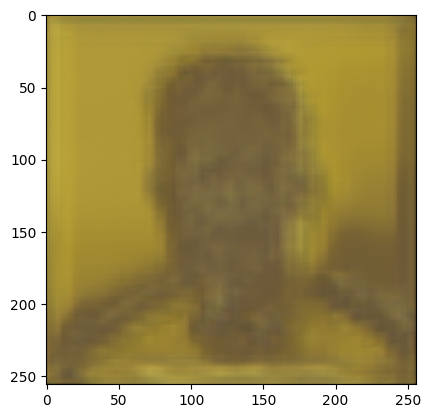

In [ ]:
# predict the original image as test image, 
# since it did not belong to the training data.
# if the domain was really adapted, then the result would look like output_img
print("output of test image")

# load the model here
model = tf.keras.models.load_model("domain_adapt_autoenc_epochs.250.keras")

# now predict and see how it adapts to the new domain
pred = model.predict(test_img_array)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.show()

### Test prediction with 100 epochs (linnemann)

output of test image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


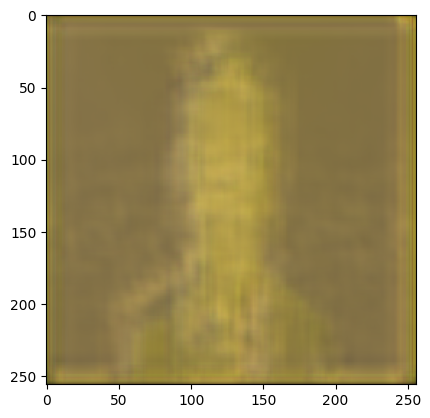

In [39]:
# predict the original image as test image, 
# since it did not belong to the training data.
# if the domain was really adapted, then the result would look like output_img
print("output of test image")

# load the model here
model = tf.keras.models.load_model("domain_adapt_autoenc_epochs.100.keras")

# now predict and see how it adapts to the new domain
pred = model.predict(test_img_array)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.show()

## Domain Adaptation (Voßmerbäumer -> Linnemann) [refined]

In [20]:
# import input img
input_img_data=[]
input_path = './data/augmented/tim_new/'
files=os.listdir(input_path)
# read all images in the folder (different rotations and flips of the original)
for i in tqdm(files):
    img=cv2.imread(input_path+'/'+i,1)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    input_img_data.append(img_to_array(img))
# -----------------------------------------  
# import output_img
output_img_data=[]
output_path = './data/augmented/linnemann_new/'
files=os.listdir(output_path)
# read all images in the folder (same rotations and flips as img)
for i in tqdm(files):
    img=cv2.imread(output_path+'/'+i,1)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    output_img_data.append(img_to_array(img))

input_img_array = np.reshape(input_img_data, (len(input_img_data), SIZE, SIZE, 3))
input_img_array = input_img_array.astype('float32') / 255. # normalize
output_img_array= np.reshape(output_img_data, (len(output_img_data), SIZE, SIZE, 3))
output_img_array = output_img_array.astype('float32') / 255. # normalize

# Original image for prediction of output_img 
# this one does not belong to the training set
test_img_data=[]

test_img=cv2.imread('./data/tim/TIM-FOTO.jpg', 1)   # Change 0 to 1 for color images
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) # Changing BGR to RGB to show images in true colors
test_img=cv2.resize(test_img,(SIZE, SIZE))
test_img_data.append(img_to_array(test_img))

test_img_array = np.reshape(test_img_data, (len(test_img_data), SIZE, SIZE, 3))
test_img_array = test_img_array.astype('float32') / 255. # normalize

# set the start time
# later needed for calculating the computation time
start=time.time()

100%|██████████| 51/51 [00:00<00:00, 378.79it/s]


## Model creation

In [13]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model3.add(MaxPooling2D((2, 2), padding='same'))
model3.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2), padding='same'))
model3.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2), padding='same'))
     
model3.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# model.summary()


c:\Users\Tim\Desktop\Studium\uni-work\AML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='einstein_logs')]

# fit the model of input_img to output_img 
epochs = 100 #5000
model.fit(input_img_array, output_img_array, epochs=epochs, shuffle=True)#, callbacks=callbacks)

# print out the computation time
finish=time.time()
print('total computation time = ', finish-start)

# save the model
model.save("domain_adapt_autoenc_epochs-" + str(epochs) + ".keras")

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.8959 - loss: 0.0109
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.8964 - loss: 0.0109
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.8974 - loss: 0.0109
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.8970 - loss: 0.0108
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.8981 - loss: 0.0108
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step - accuracy: 0.8980 - loss: 0.0107
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.8980 - loss: 0.0107
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - accuracy: 0.8987 - loss: 0.0106
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step - accuracy: 0.8981 - loss: 0.0107
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step - accuracy: 0.8983 - loss: 0.0106
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.8984 - loss: 0.0108
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy:

In [12]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='einstein_logs')]

# fit the model of input_img to output_img 
epochs = 250 #5000
model3.fit(input_img_array, output_img_array, epochs=epochs, shuffle=True)#, callbacks=callbacks)

# print out the computation time
finish=time.time()
print('total computation time = ', finish-start)

# save the model
model3.save("domain_adapt_autoenc_epochs-" + str(epochs) + ".keras")

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step - accuracy: 0.8753 - loss: 0.0139
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step - accuracy: 0.8758 - loss: 0.0139
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step - accuracy: 0.8795 - loss: 0.0138
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step - accuracy: 0.8792 - loss: 0.0138
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step - accuracy: 0.8811 - loss: 0.0138
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.8788 - loss: 0.0137
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.8814 - loss: 0.0137
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.8809 - loss: 0.0137
Epoch 9/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.8815 - loss: 0.0136
Epoch 10/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.8826 - loss: 0.0136
Epoch 11/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.8817 - loss: 0.0136
Epoch 12/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - accuracy:

In [14]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='einstein_logs')]

# fit the model of input_img to output_img 
epochs = 5000 #5000
model3.fit(input_img_array, output_img_array, epochs=epochs, shuffle=True)#, callbacks=callbacks)

# print out the computation time
finish=time.time()
print('total computation time = ', finish-start)

# save the model
model3.save("domain_adapt_autoenc_epochs-" + str(epochs) + ".keras")

Epoch 1/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.0078 - loss: 0.0775
Epoch 2/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - accuracy: 0.0015 - loss: 0.0693
Epoch 3/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step - accuracy: 5.0055e-04 - loss: 0.0676
Epoch 4/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step - accuracy: 5.0204e-04 - loss: 0.0619
Epoch 5/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 6.1304e-04 - loss: 0.0508
Epoch 6/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - accuracy: 0.0095 - loss: 0.0384
Epoch 7/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - accuracy: 0.2708 - loss: 0.0274
Epoch 8/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - accuracy: 0.7699 - loss: 0.0284
Epoch 9/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.7967 - loss: 0.0278
Epoch 10/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - accuracy: 0.8007 - loss: 0.0260
Epoch 11/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - accuracy: 0.8018 - loss: 0.0263
Epoch 12/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1

## Refined Domain adaptation with 100 epochs (Linnemann)

output of test image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


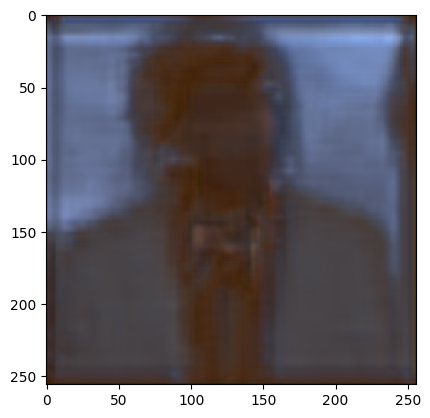

In [17]:
# predict the original image as test image, 
# since it did not belong to the training data.
# if the domain was really adapted, then the result would look like output_img
print("output of test image")

# load the model here
model = tf.keras.models.load_model("domain_adapt_autoenc_epochs-100.keras")

# now predict and see how it adapts to the new domain
pred = model.predict(test_img_array)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.show()

## Refined Domain adaptation with 250 epochs (TIM-FOTO)

output of test image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.01783935..1.2112756].


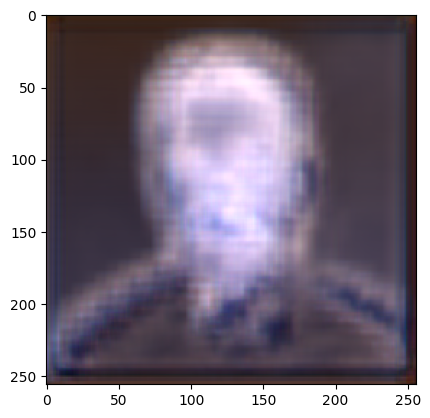

In [15]:
# predict the original image as test image, 
# since it did not belong to the training data.
# if the domain was really adapted, then the result would look like output_img
print("output of test image")

# load the model here
model = tf.keras.models.load_model("domain_adapt_autoenc_epochs-250.keras")

# now predict and see how it adapts to the new domain
pred = model.predict(test_img_array)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.show()

## Refined Model Adaptation with 5000 epochs (Linnemann)

output of test image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0..4.8522477].


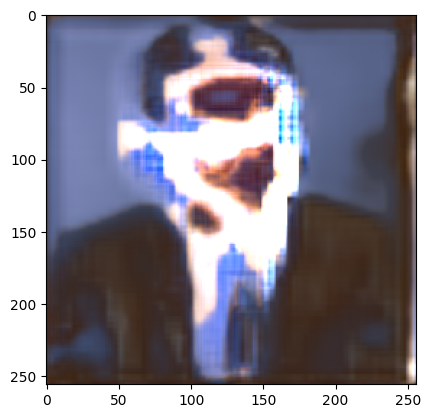

In [18]:
# predict the original image as test image, 
# since it did not belong to the training data.
# if the domain was really adapted, then the result would look like output_img
print("output of test image")

# load the model here
model = tf.keras.models.load_model("domain_adapt_autoenc_epochs-5000.keras")

# now predict and see how it adapts to the new domain
pred = model.predict(test_img_array)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.show()

## Refined Model Adaptation with 5000 epochs (TIM-FOTO)

output of test image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0..4.8500175].


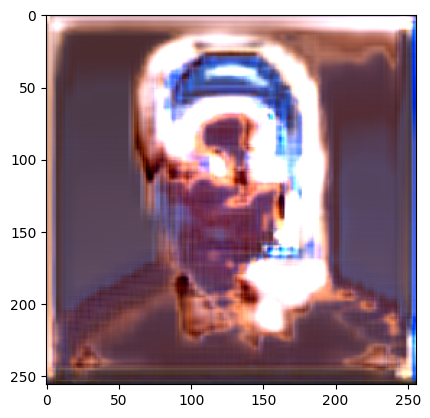

In [21]:
# predict the original image as test image, 
# since it did not belong to the training data.
# if the domain was really adapted, then the result would look like output_img
print("output of test image")

# load the model here
model = tf.keras.models.load_model("domain_adapt_autoenc_epochs-5000.keras")

# now predict and see how it adapts to the new domain
pred = model.predict(test_img_array)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.show()